In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import CAPM_fn as capm
import importlib
importlib.reload(capm)

%matplotlib inline

In [102]:
tickers = ['^GSPC','^KS11','KRW=X','KRWUSD=X']
N = 100
end = dt.datetime.now()
start = end - dt.timedelta(weeks=52*N)
interval='1d'
frequency = {'1d':252, '1wk':52, '1mo': 12}
frequency = frequency[interval]

stock_df = capm.get_data_yf(tickers, start, end, interval, OHLC='Adj Close', market=False)

SP500 = stock_df['^GSPC'] # Index in USD
KOSPI = stock_df['^KS11'] # Index in KRW
USD_KRW = stock_df['KRWUSD=X'] # KRW Price in USD, XUSD/1KRW
KRW_USD = stock_df['KRW=X'] # USD Price in KRW, XKRW/1USD

frequency

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


252

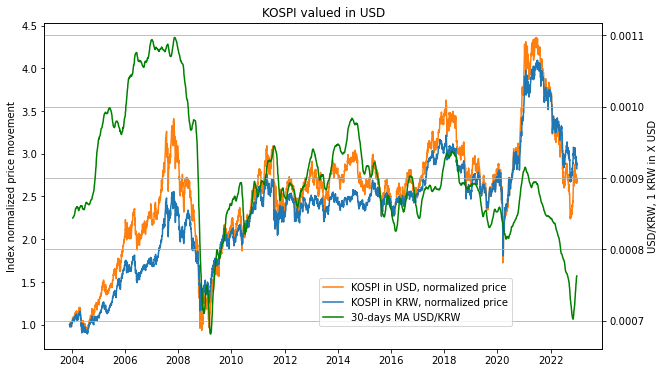

In [111]:
# KOSPI in USD, reflect's foreign investor's view on KOSPI
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

KOSPI_USD = KOSPI * USD_KRW
ax1.plot(KOSPI_USD/KOSPI_USD[0], color='tab:orange', label='KOSPI in USD, normalized price')
ax1.plot(KOSPI/KOSPI[0], color='tab:blue', label='KOSPI in KRW, normalized price')

# Falling Exchange rate of USD_KRW means weakening KRW against USD
ax2.plot(USD_KRW.rolling(30).mean(), color='green', label='30-days MA USD/KRW')

plt.title('KOSPI valued in USD')
ax1.set_ylabel('Index normalized price movement')
ax2.set_ylabel('USD/KRW, 1 KRW in X USD')
plt.grid()
fig.legend(bbox_to_anchor=(0.5, 0.3), loc="upper left");

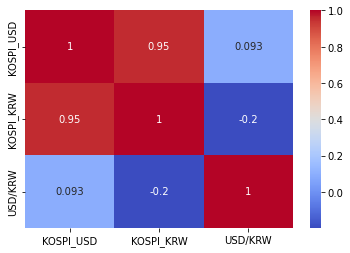

In [112]:
df = pd.concat([KOSPI_USD, KOSPI, USD_KRW], axis=1).set_axis(['KOSPI_USD', 'KOSPI_KRW', 'USD/KRW'], axis=1)
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True);

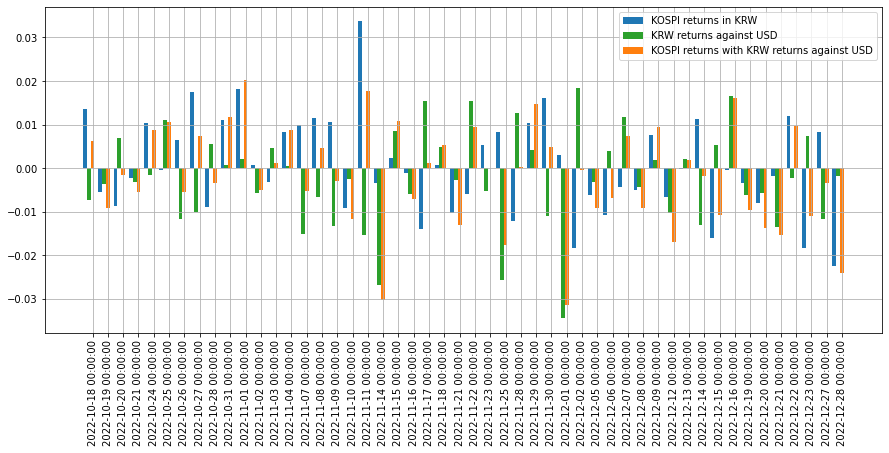

In [159]:
Ndays = 50
gross_ret_KOSPI = 1+capm.simp_ret(KOSPI)
gross_ret_KOSPI = gross_ret_KOSPI.iloc[-Ndays:]
gross_ret_KRW = 1+capm.simp_ret(KRW_USD)
gross_ret_KRW = gross_ret_KRW.iloc[-Ndays:]
gross_ret_KOSPI_USD = gross_ret_KOSPI * gross_ret_KRW

n=len(gross_ret_KOSPI_USD)
r = np.arange(n)
width = 0.5

plt.figure(figsize=(15,6))
plt.bar(r-width/2, (gross_ret_KOSPI - 1), label='KOSPI returns in KRW',width=0.25, color='tab:blue')
plt.bar(r, (gross_ret_KRW - 1), label='KRW returns against USD',width=0.25, color='tab:green')
plt.bar(r+width/2, (gross_ret_KOSPI_USD - 1), label='KOSPI returns with KRW returns against USD',width=0.25, color='tab:orange')

plt.xticks(r + width/2, gross_ret_KOSPI_USD.index, rotation=90)
plt.grid()
plt.legend();

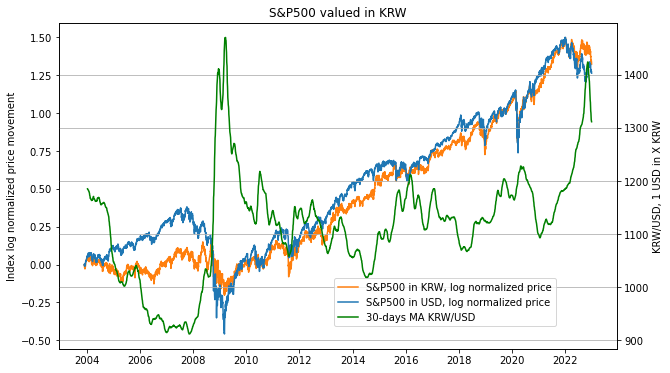

In [160]:
# S&P500 in KRW, Attractiveness of FX-hedged S&P500 ETF
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

SP500_KRW = SP500 * KRW_USD
ax1.plot(np.log(SP500_KRW/SP500_KRW[0]), color='tab:orange', label='S&P500 in KRW, log normalized price')
ax1.plot(np.log(SP500/SP500[0]), color='tab:blue', label='S&P500 in USD, log normalized price')

# Rising Exchange rate of KRW_USD means strengthening USD against KRW
ax2.plot(KRW_USD.rolling(30).mean(), color='green', label='30-days MA KRW/USD')

plt.title('S&P500 valued in KRW')
ax1.set_ylabel('Index log normalized price movement')
ax2.set_ylabel('KRW/USD, 1 USD in X KRW')
plt.grid()
fig.legend(bbox_to_anchor=(0.5, 0.3), loc="upper left");

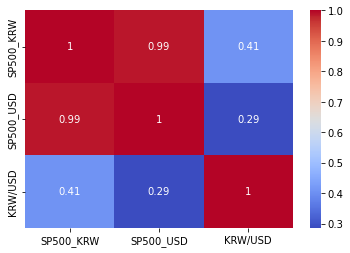

In [161]:
df = pd.concat([SP500_KRW, SP500, KRW_USD], axis=1).set_axis(['SP500_KRW', 'SP500_USD', 'KRW/USD'], axis=1)
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True);